<a href="https://colab.research.google.com/github/aniketshinde8483/A-Smart-Application-Tracking-System-ATS-/blob/main/Geospatial_Analysis_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installation of geopandas

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
municipality=gpd.read_file('/content/municipality.shp')

In [ ]:
municipality_geojson = gpd.read_file('/content/municipality.geojson')

Reading Meta Data

In [ ]:
len(municipality)

775

In [ ]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.6662 27.73004, 87.66659 27.73, 87..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [ ]:
municipality.geom_type

,0
0,Polygon
1,Polygon
2,Polygon
3,Polygon
4,Polygon
...,...
770,Polygon
771,Polygon
772,Polygon
773,Polygon


In [ ]:
municipality.shape

(775, 6)

In [ ]:
municipality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
type(municipality)

geopandas.geodataframe.GeoDataFrame

Map Visualization

<Axes: >

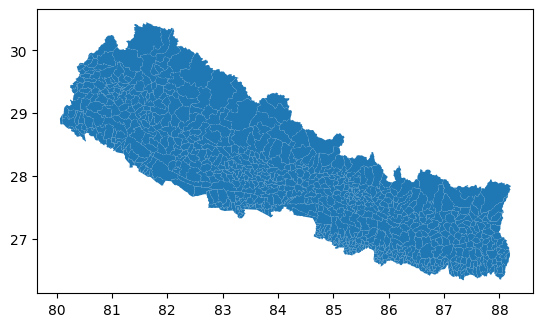

In [ ]:
municipality.plot()

<Axes: >

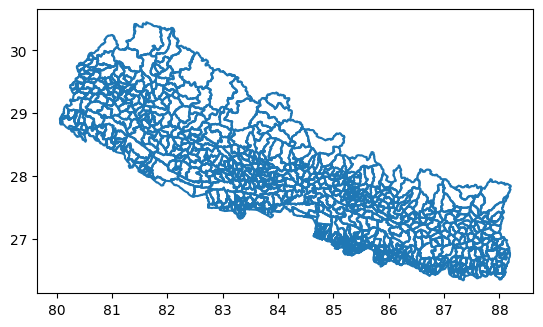

In [ ]:
municipality.boundary.plot()

<Axes: >

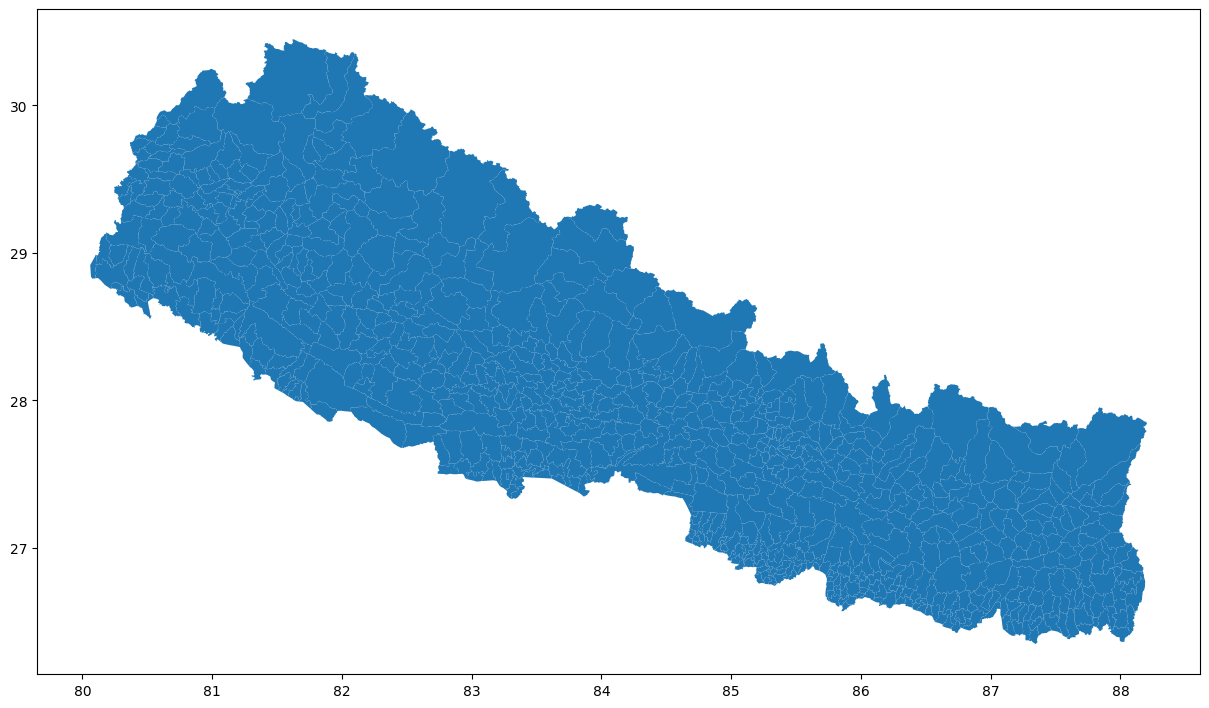

In [ ]:
municipality.plot(figsize=(15,15))

<Axes: >

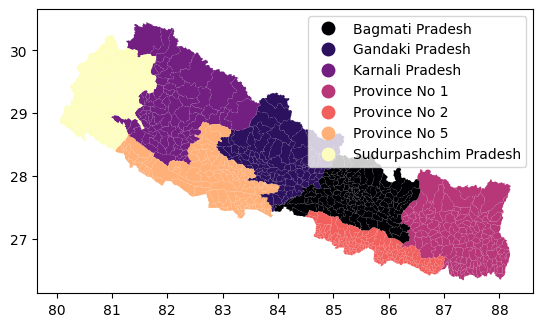

In [ ]:
municipality.plot("PR_NAME",cmap="magma",legend=True)

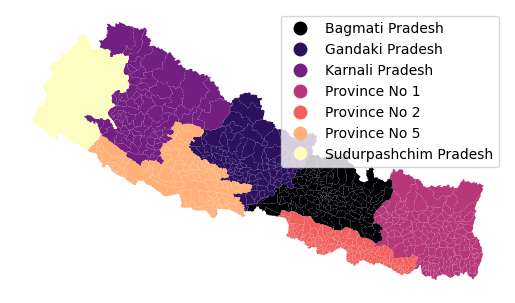

In [ ]:
ax= municipality.plot("PR_NAME",cmap="magma",legend=True)
ax.set_axis_off()

Working Attribute

In [ ]:
rupandehi=municipality[municipality['DISTRICT']=="RUPANDEHI"]

<Axes: >

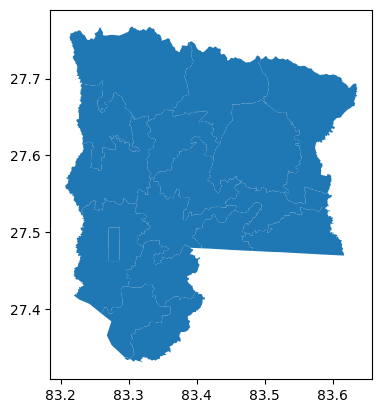

In [ ]:
rupandehi.plot()

In [ ]:
len(rupandehi)

17

In [ ]:
rupandehi.shape

(17, 6)

<Axes: >

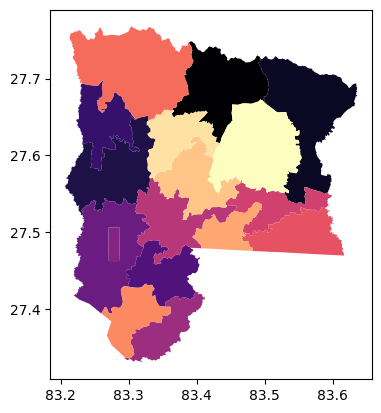

In [ ]:
rupandehi.plot("PALIKA",cmap='magma')

In [ ]:
municipality1 = municipality

In [ ]:
municipality1['area']=0

In [ ]:
municipality1.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943...",0
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831...",0
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768...",0
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.6662 27.73004, 87.66659 27.73, 87...",0
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119...",0


In [ ]:
municipality_crs= municipality1.to_crs(epsg=32645)

In [ ]:
municipality_crs['area']=municipality_crs.area/10**6

In [ ]:
municipality_crs.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((560307.153 3027612.864, 560428.32 30...",88.521700
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((549815.446 3034054.303, 550082.592 3...",137.371061
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((550573.02 3049473.152, 550537.274 30...",209.626709
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((565665.744 3067475.242, 565704.431 3...",441.435863
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((582308.234 3092096.983, 582369.345 3...",1851.420797


<Axes: >

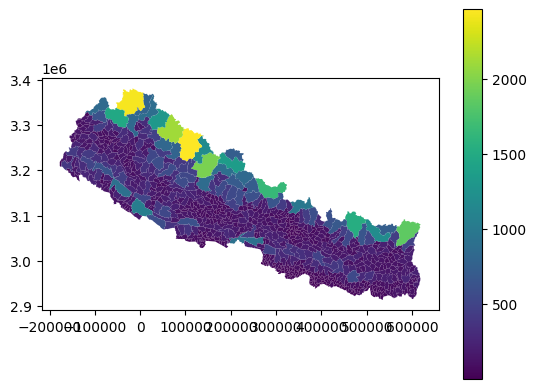

In [ ]:
municipality_crs.plot('area',legend=True)

Working With Geometry

In [ ]:
import shapely

In [ ]:
from shapely.geometry import Point, Polygon,LineString

In [ ]:
#creatin a geometric object
point = Point(1,1) # Changed variable name to point1
line = LineString([(0,0),(5,9),(10,8)]) # Changed variable name to line1
poly = line.buffer(1)

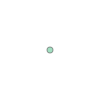

In [ ]:
point

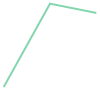

In [ ]:
line

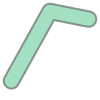

In [ ]:
poly

In [ ]:
point.within(poly)

True

In [ ]:
point1=Point(1,7)
point1.within(poly)

False

In [ ]:
poly.contains(point)

True

In [ ]:
gs = gpd.GeoSeries([Point(-10,15),Point(10,2),Point(-5,16)])
gs

,0
0,POINT (-10 15)
1,POINT (10 2)
2,POINT (-5 16)


<Axes: >

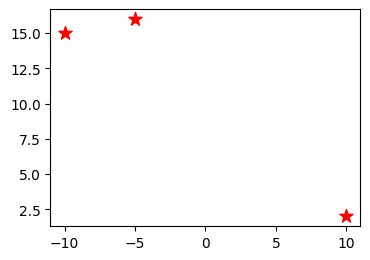

In [ ]:
gs.plot(marker='*',color='red',markersize=100,figsize=(4,4))

In [ ]:
palpa = municipality[municipality['DISTRICT']=='PALPA']

<Axes: >

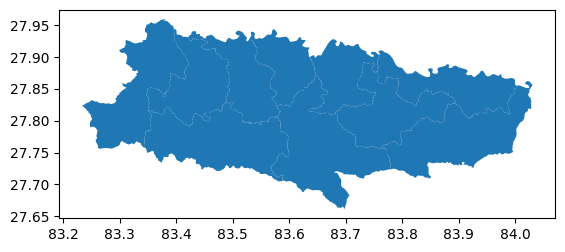

In [ ]:
palpa.plot()

<Axes: >

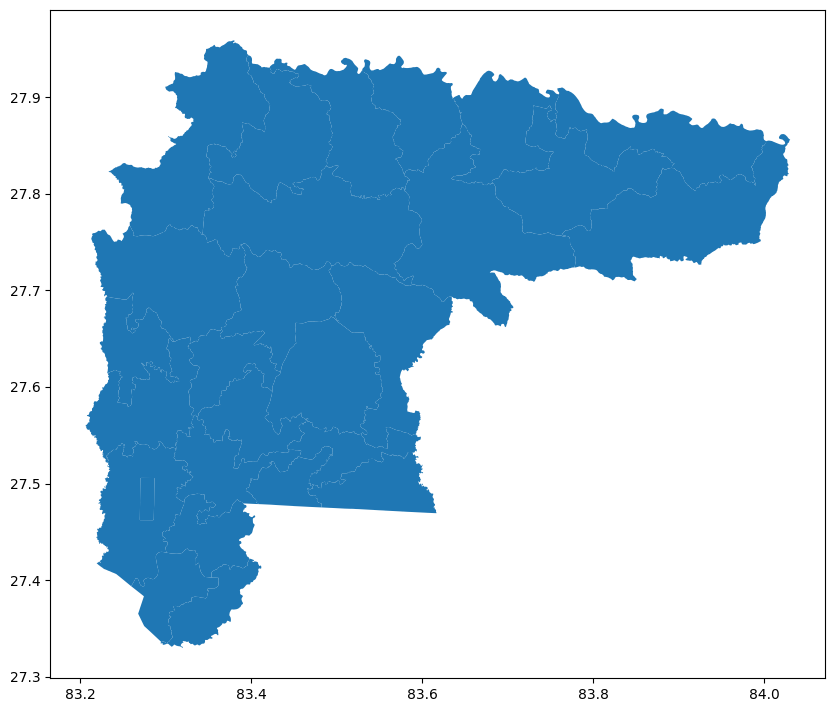

In [ ]:
ax =rupandehi.plot(figsize=(10,10))
palpa.plot(ax=ax)

Exercies
1) Find the palikas having area greater than 50sq.km and plot them along with the legend

In [ ]:
!pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import mapclassify
import folium
import matplotlib


In [ ]:
rupandehi.explore()

In [ ]:
rupandehi.explore(column= 'PALIKA',cmap = 'magma')

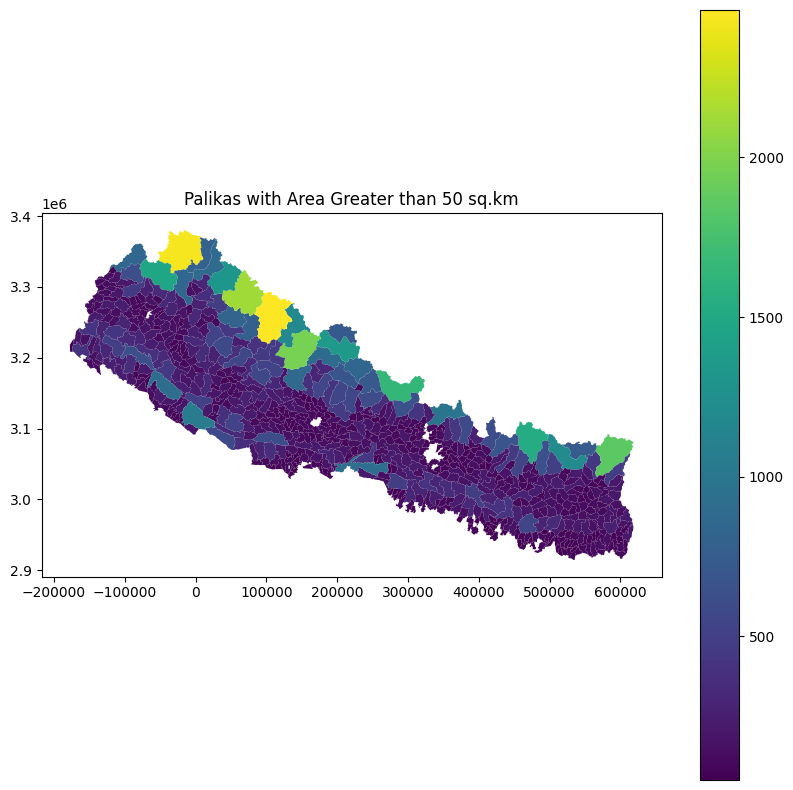

In [ ]:
# The answer for the question given in the same colab notebook
palikas_over_50 = municipality_crs[municipality_crs['area'] > 50]

ax = palikas_over_50.plot(column='area', legend=True, figsize=(10, 10))
ax.set_title('Palikas with Area Greater than 50 sq.km')
plt.show()
